<h2>Projeto Ciência de Dados - Previsão de Vendas</h2>

<p>Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa investe: TV, RÁDIO e JORNAL</p>

<h4>Passo a Passo de um Projeto de Ciência de Dados</h4>

- Passo 01: Entendimento do desafio
- Passo 02: Entendimento da área / empresa
- Passo 03: Extração / Obtenção dos Dados
- Passo 04: Ajuste dos Dados (Tratamento e Limpeza)
- Passo 05: Análise exploratória
- Passo 06: Modelagem + Algorítmos (Aqui entra a inteligência artificial se necessário)
- Passo 07: Interpretação dos resultados


### Projeto Ciência de Dados - Previsão de Vendas

 - Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios de: TV, RÁDIO e JORNAL
 - TV, RÁDIO e JORNAL, estão em milhares de reais
 - VENDAS está em milhões

<h2> <font color = "yellow">Passo 03: Importar a Base de Dados</font> </h2>

In [1]:
import pandas

In [2]:
tabela = pandas.read_csv("F:/PythonImpressionador/Aula04/Arquivo/advertising.csv")

In [3]:
display(tabela)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [4]:
print(tabela.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


<h2> <font color = "yellow">Passo 05: Análise Exploratória</font> </h2>
    
 - Vamos tentar visualizar como as informações de cada item estão distribuídos
 - Vamos ver a correlação entre cada um dos itens

In [ ]:
# Instalação de pacotes

#!pip install matplotlib

#!pip install seaborn

#!pip install scikit.learn

In [5]:
# Importação dos pacotes

import matplotlib

import seaborn

In [6]:
print(tabela.corr())

              TV     Radio    Jornal    Vendas
TV      1.000000  0.054809  0.056648  0.901208
Radio   0.054809  1.000000  0.354104  0.349631
Jornal  0.056648  0.354104  1.000000  0.157960
Vendas  0.901208  0.349631  0.157960  1.000000


<Axes: >

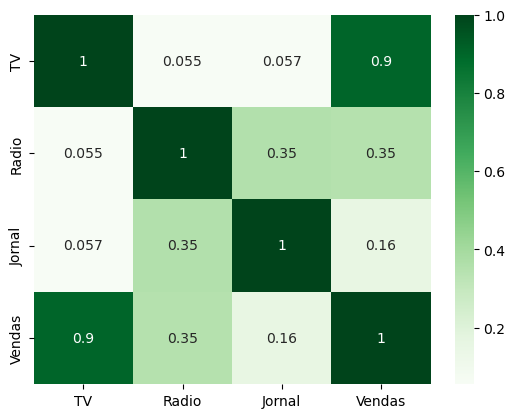

In [7]:
seaborn.heatmap(tabela.corr(), cmap = "Greens", annot = True)

 - Com isso, podemos partir para a preparação dos dados para treinamento em modelo de machine learning

<h2> <font color = "yellow">Passo 06: Modelagem + Algorítmos</font> </h2>

In [8]:
# Separando em Dados de treino e Dados de teste

x = tabela[["TV", "Radio", "Jornal"]]
y = tabela["Vendas"] # Previsão

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.3)

<h4>Temos um problema de regressão - Temos que escolher os modelos que serão usados</h4>

 - Regressão Linear
 - RandomForest

In [12]:
# Importar a inteligência artificial

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [13]:
# Criar a inteligência artificial

modelo_regressao_linear = LinearRegression()
modelo_random_forest = RandomForestRegressor()

In [14]:
# Treinar a inteligência artificial

modelo_regressao_linear.fit(x_treino, y_treino)
modelo_random_forest.fit(x_treino, y_treino)

RandomForestRegressor()

<h4>Teste de IA e Avaliação do Melhor Modelo</h4>

 - Será utilizado o R&sup2; -> diz a % que o modelo consegue explicar o que aconteceu

In [15]:
previsao_regressao_linear = modelo_regressao_linear.predict(x_teste)
previsao_random_forest = modelo_random_forest.predict(x_teste)

In [16]:
from sklearn.metrics import r2_score

In [17]:
print(r2_score(y_teste, previsao_regressao_linear))
print(r2_score(y_teste, previsao_random_forest))

0.8655051474445764
0.9376831295060692


<h4>Visualização Gráfica das Previsões</h4>

In [18]:
tabela_auxiliar = pandas.DataFrame()

tabela_auxiliar["y_teste"] = y_teste
tabela_auxiliar["Previsao_random_forest"] = previsao_random_forest
tabela_auxiliar["Previsao_regressao_linear"] = previsao_regressao_linear

In [19]:
display(tabela_auxiliar)

,y_teste,Previsao_random_forest,Previsao_regressao_linear
28,18.9,20.022,21.229873
22,5.6,6.284,6.814253
111,21.8,22.141,22.065191
107,12.0,11.176,9.372900
23,20.5,19.825,18.932768
180,15.5,15.875,13.332727
135,11.6,10.796,12.311314
29,10.5,11.871,10.030969
136,9.5,8.804,10.141763
59,18.4,18.253,19.386322


<Axes: >

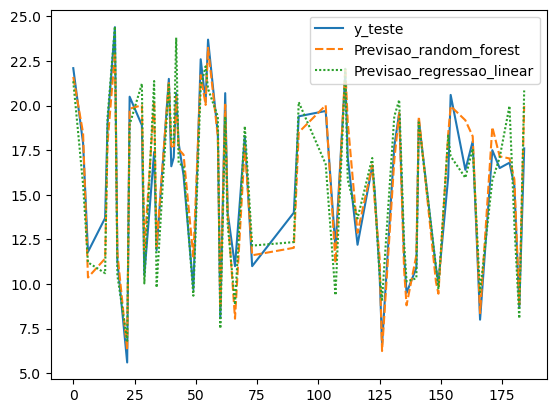

In [20]:
seaborn.lineplot(data = tabela_auxiliar)

<h4>Como testar uma nova previsão ?</h4>

In [21]:
# Necessário possuir nova base de dados onde ainda não tenha sido treinado

nova_tabela = pandas.read_csv("F:/PythonImpressionador/Aula04/Arquivo/novos.csv")

In [22]:
display(nova_tabela)

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


In [23]:
nova_previsao = modelo_random_forest.predict(nova_tabela)
display(nova_previsao)

array([ 7.669,  8.432, 20.73 ])